In [9]:
ls

00-53-58_wo-jitter-and-specaug/
02-19-09_wo-specaug-exp2-50e/
03-18-50_w-gaussian-exp1-50e-std0.1-mean0.01/
03-44-58_wo-specaug-exp3-50e/
05-46-32_wo-jitter-exp2-50e/
07-36-44_wo-jitter-exp3-50e/
19-29-01_w-gaussian-exp1-50e-std0.05/
20-10-59_basic/
22-36-40_wo-specaug/
22-43-11_w-gaussian-exp1-50e-std0.1/
23-51-10_wo-jitter/
venv/
visualize.ipynb


In [25]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import os

log_files = []
out_files = []
labels = []

root = "fig2_noise"
# Define log files
for dir in os.listdir(root):
    if dir == "venv" or dir == "visualize.ipynb" or dir == ".DS_Store":
        continue

    labels.append(dir)
    for x in os.listdir(f"{root}/{dir}/submitit_logs/"):
        f = os.listdir(f"{root}/{dir}/submitit_logs/{x}")
        if len(f) > 0:
            log_files.append(f"{root}/{dir}/submitit_logs/{x}/{x}_0_log.err")
            out_files.append(f"{root}/{dir}/submitit_logs/{x}/{x}_0_log.out")

print(log_files)
print(out_files)
print(labels)

['fig2_noise/gaussian-std:0.1-mean:0.01/submitit_logs/129983/129983_0_log.err', 'fig2_noise/gaussian-std:0.05-mean:0/submitit_logs/10347/10347_0_log.err', 'fig2_noise/gaussian-std:0.1-mean:0/submitit_logs/59031/59031_0_log.err']
['fig2_noise/gaussian-std:0.1-mean:0.01/submitit_logs/129983/129983_0_log.out', 'fig2_noise/gaussian-std:0.05-mean:0/submitit_logs/10347/10347_0_log.out', 'fig2_noise/gaussian-std:0.1-mean:0/submitit_logs/59031/59031_0_log.out']
['gaussian-std:0.1-mean:0.01', 'gaussian-std:0.05-mean:0', 'gaussian-std:0.1-mean:0']


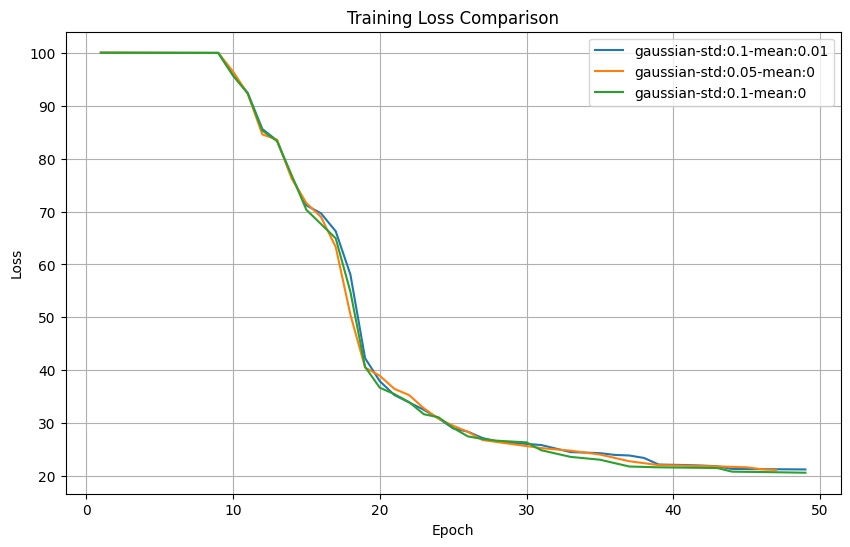

In [26]:
# import matplotlib.pyplot as plt
# import re
# import pandas as pd
# import os

# log_files = []
# out_files = []
# labels = []
# # Define log files
# for dir in os.listdir("."):
#     if "window" in dir:
#         labels.append(dir)
#         for x in os.listdir(f"logs/{dir}/submitit_logs/"):
#             f = os.listdir(f"logs/{dir}/submitit_logs/{x}")
#             if len(f) > 0:
#                 log_files.append(f"logs/{dir}/submitit_logs/{x}/{x}_0_log.err")
#                 out_files.append(f"logs/{dir}/submitit_logs/{x}/{x}_0_log.out")

# log_files = ["baseline_log.txt", "experiment1_log.txt", "experiment2_log.txt"]
# labels = ["Baseline", "Experiment 1", "Experiment 2"]

# Regular expression for extracting loss
# Epoch 10, global step 1320: 'val/CER' reached 97.12007
loss_pattern = re.compile(r"Epoch (\\d+) reached ([\d\.]+)")
# Updated regex function to parse epoch and CER values
def parse_log_line(line):
    epoch_match = re.search(r"Epoch (\d+)", line)
    val_match = re.search(r"'val/CER' reached ([\d.]+)", line)
    # print(epoch_match, val_match)
    if epoch_match and val_match:
        return int(epoch_match.group(1)), float(val_match.group(1))
    return None, None

# Function to extract loss from logs
def extract_loss(log_file):
    epochs, losses = [], []
    with open(log_file, 'r') as f:
        for line in f:
            epoch, loss = parse_log_line(line)
            if epoch:
                # print(epoch, loss)
                epochs.append(epoch)
                losses.append(loss)
    return epochs, losses

# Extract and plot loss for each log
plt.figure(figsize=(10, 6))
for log_file, label in zip(log_files, labels):
    epochs, losses = extract_loss(log_file)
    plt.plot(epochs, losses, label=label)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
log_files

['logs/windows=8s/submitit_logs/3274/3274_0_log.err',
 'logs/window=8s-stripe=4s/submitit_logs/19951/19951_0_log.err',
 'logs/window=1s/submitit_logs/52041/52041_0_log.err',
 'logs/window=2s/submitit_logs/22279/22279_0_log.err',
 'logs/windows=4s/submitit_logs/5295/5295_0_log.err']

In [28]:

# Extract validation and test tables
val_test_pattern = re.compile(r"\│(.*)\│")

def extract_table(log_file):
    table = []
    with open(log_file, 'r') as f:
        table_started = False
        for line in f:
            if line.startswith('│'):
                table_started = True
                row = [item.strip() for item in line.strip().split('│')[1:-1]]
                table.append(row)
            elif table_started and not line.startswith('│'):
                break
    return table

# Collect tables from all logs
tables = [extract_table(log_file) for log_file in out_files]
print(tables)

# Combine into a DataFrame for comparison
headers = tables[0][0]  # Assume headers are the same for all logs
data = {}

for label, table in zip(labels, tables):
    for row in table:
        metric = row[0]
        values = row[1:]
        if metric not in data:
            data[metric] = {}
        data[metric][label] = values

# Create and display combined DataFrame
final_table = []
for metric, values in data.items():
    row = [metric]
    for label in labels:
        row.extend(values.get(label, ['N/A']))
    final_table.append(row)

# Create column headers for final comparison table
comparison_headers = ["Metric"] + labels


comparison_df = pd.DataFrame(final_table, columns=comparison_headers)
print("Final Validation and Test Set Comparison:")
print(comparison_df.to_string(index=False))


[[['val/CER', '85.42312622070312'], ['val/DER', '0.0'], ['val/IER', '84.42623138427734'], ['val/SER', '0.9968985319137573'], ['val/loss', '1.9967961311340332']], [['val/CER', '32.077980041503906'], ['val/DER', '1.7058041095733643'], ['val/IER', '13.646432876586914'], ['val/SER', '16.72574234008789'], ['val/loss', '1.0393420457839966']], [['val/CER', '21.415929794311523'], ['val/DER', '1.747787594795227'], ['val/IER', '7.27876091003418'], ['val/SER', '12.38938045501709'], ['val/loss', '0.8003359436988831']], [['val/CER', '20.713336944580078'], ['val/DER', '1.6836508512496948'], ['val/IER', '6.1807708740234375'], ['val/SER', '12.84891414642334'], ['val/loss', '0.728911280632019']], [['val/CER', '28.555604934692383'], ['val/DER', '1.8165706396102905'], ['val/IER', '10.190518379211426'], ['val/SER', '16.54851531982422'], ['val/loss', '0.913901686668396']]]
Final Validation and Test Set Comparison:
  Metric         windows=8s window=8s-stripe=4s          window=1s          window=2s        